# MNIST DATASET PROJECT

Sean Moylan
<br>
G00299424

## References
https://www.youtube.com/watch?v=wQ8BIBpya2k&t=1004s<br>
https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb<br>
https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/<br>
https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/plot_streamplot.html<br>

***

To get started I downloaded the MNIST dataset from http://yann.lecun.com/exdb/mnist/
<br>
I first unziped the files into the /data directory to avoid using a library to extract from within this Notebook
<br>
The Nural network is going to be made up of the input layer, 2 hidden layers followed by an output layer using a sigmoid function to determine the data.

The MNIST dataset consists of training and testing images that are 28 X 28 pixels<br>


![alt text](neuralnetwork.png "Neural Network")

# Retrieving MNIST Dataset

In [1]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from matplotlib import gridspec
from PIL import Image, ImageOps


# I found a useful way to import the dataset straight from tensorflow as follows
mnistData = tf.keras.datasets.mnist;

## Unpack, Display and Normalize the data

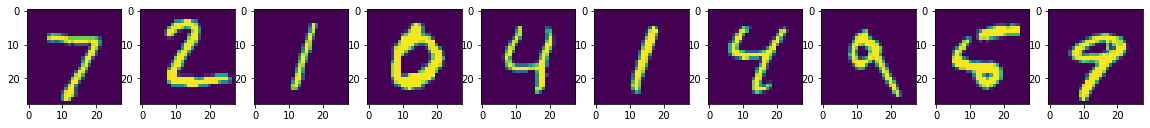

In [2]:
# Unpack the dataset, using this method of data retrieval we save on over complicating when reading it in
# This will give us 4 sets of data in bytes. x_train, y_train, x_test and y_test
(x_train, y_train), (x_test, y_test) = mnistData.load_data()

# To display an image we can use matplot to help
plt.figure(1, figsize=(20,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    imagex = np.squeeze(x_test[i])
    plt.imshow(imagex)



In [3]:
# Display the shape of the data
print('Train', x_train.shape, y_train.shape)
print('Train', x_test.shape, y_test.shape)

Train (60000, 28, 28) (60000,)
Train (10000, 28, 28) (10000,)


In [4]:
# summarize pixel values
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644


In [5]:
# used for scaling pixel data between 0-1
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
# reshape data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [8]:
print('Train min=%.1f, max=%.1f' % (x_train.min(), x_train.max()))
print('Test min=%.1f, max=%.1f' % (x_train.min(), x_train.max()))

Train min=0.0, max=255.0
Test min=0.0, max=255.0


In [9]:
# Groups images into batches of 64 images per epoch
iterator_test = datagen.flow(x_train, y_train, 64)
iterator_train = datagen.flow(x_train, y_train, 64)

In [10]:
#
print('Batches train=%d, test=%d' % (len(iterator_train), len(iterator_test)))

Batches train=938, test=938


In [11]:
# Display the new shape of the data
x_batch, y_batch = iterator_train.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (x_batch.shape, y_batch.min(), x_batch.max()))

Batch shape=(64, 28, 28, 1), min=0.000, max=1.000


## Building the model

In [12]:
model = Sequential()

In [13]:
# 1st Layer is the input layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)))

# Hidden layer
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
                 
# Outputlayer will have the same amount of nurons as there are numbers for output so 10
# Softmax for probability distribution
model.add(Dense(10, activation='softmax'))

In [14]:
# Model does not optimize accurecy but instead tries to minimise the loss

# Adam optimizer with categorical crossentropy, 
#model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Same but with Stochastic gradient descent optimizer
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [15]:
# Here we set the Epochs = 5 which means we pass the training set through the network 5 times
model.fit(x_train, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 467us/sample - loss: 0.2559 - accuracy: 0.9472
Epoch 2/5
60000/60000 [==============================] - 30s 503us/sample - loss: 0.0645 - accuracy: 0.9812
Epoch 3/5
60000/60000 [==============================] - 30s 507us/sample - loss: 0.0494 - accuracy: 0.9850
Epoch 4/5
60000/60000 [==============================] - 30s 494us/sample - loss: 0.0408 - accuracy: 0.9876
Epoch 5/5
60000/60000 [==============================] - 30s 507us/sample - loss: 0.0324 - accuracy: 0.9900


## Model Summary

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.04339044800516494 0.9873


## Save Model to Json and weights to .h5 file 

In [18]:
# Make a Prediction based on the model
#predictions = model.predict([x_test[0]])

# save model to json format so it can be added to WebApp
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save weights
model.save_weights("model.h5")

In [2]:
json_model = open('model.json','r')
load_model_json = json_model.read()
json_model.close()
loaded_model = model_from_json(load_model_json)

loaded_model.load_weights('model.h5')



In [3]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

# Visualise data

## Predict Test images against loaded model

In [5]:
loaded_predications = loaded_model.predict(x_test)

plt.figure(1, figsize=(20,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title("Predicts: "+str(np.argmax(loaded_predications[i])))
    imagex = np.squeeze(x_test[i])
    plt.imshow(imagex)

NameError: name 'x_test' is not defined

## Read in image from file system and predict its value
adapted from: https://blog.tanka.la/2018/10/28/build-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python/

<PIL.Image.Image image mode=L size=112x112 at 0x633118950>


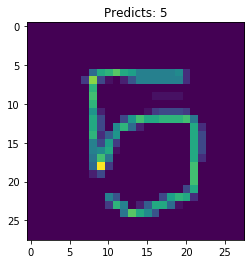

In [4]:
original_image = Image.open('drawing.png').convert("L")
print(original_image)
size = (28,28)
original_image = ImageOps.fit(original_image, size, Image.ANTIALIAS)

img_array = np.array(original_image).reshape(1,28,28,1)
prediction1 = loaded_model.predict(img_array)

plt.title("Predicts: "+str(np.argmax(prediction1)))
plt.imshow(original_image)